In [1]:
#Analyze data

#Import libraries
import numpy as np
import cv2

#Cargo imagen de ejemplo
file = "example_data/image1.png"
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

#Imprimo dimensiones de la imagen, tipo y rangos de valores
print("Dimensiones de la imagen: ", img.shape)
print("Tipo de la imagen: ", img.dtype)
print("Rango de valores de la imagen: ", np.min(img), np.max(img))
print("Número de canales: ", img.ndim)


#Cargo imagen de ejemplo de pilar
file = "example_data/image4_edited.png"

#Cargo imagen de ejemplo
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

temp_file = 'example_data/temp_image.png'
cv2.imwrite(temp_file, img)

file = temp_file

#Imprimo dimensiones de la imagen, tipo y rangos de valores
print("Dimensiones de la imagen: ", img.shape)
print("Tipo de la imagen: ", img.dtype)
print("Rango de valores de la imagen: ", np.min(img), np.max(img))
print("Número de canales: ", img.ndim)





Dimensiones de la imagen:  (768, 768)
Tipo de la imagen:  uint8
Rango de valores de la imagen:  0 255
Número de canales:  2
Dimensiones de la imagen:  (768, 768)
Tipo de la imagen:  uint8
Rango de valores de la imagen:  0 255
Número de canales:  2


{'thickness': np.float64(214.33333333333334), 'area': np.float64(1.30055), 'vascular_index': np.float64(0.37168), 'vessel_area': np.float64(0.483393), 'raw_thickness': array([252, 248, 143])}


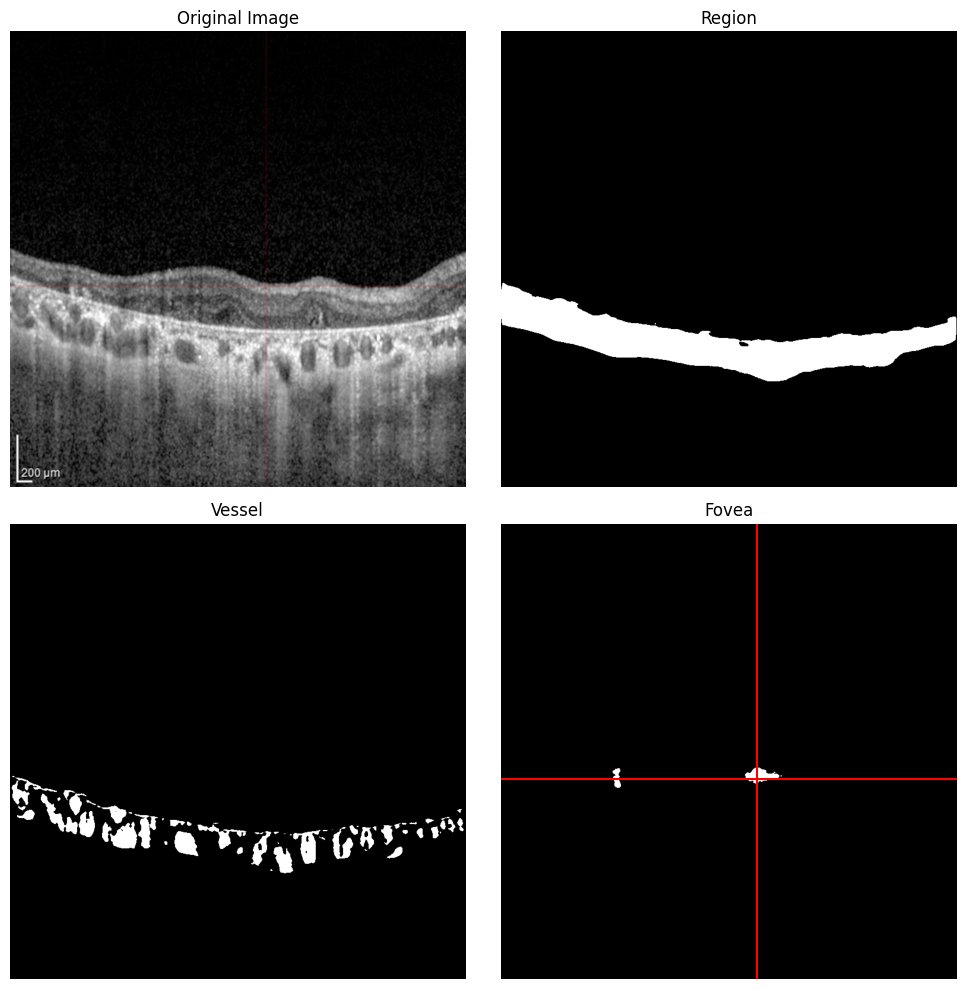

In [2]:
from choroidalyze import Choroidalyzer
import cv2


# This initialises choroidalyzer. 
# It will try to automatically download the model weights from github the first time you run it. 
choroidalyzer = Choroidalyzer()

#Cargo imagen de ejemplo
file = "example_data/image4_edited.png"
#Convierto imagen a blanco y negro
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
#Guardo la nuena imagen
temp_file = 'example_data/temp_image.png'
cv2.imwrite(temp_file, img)
file = temp_file

# basic useage: get the metrics
metrics = choroidalyzer.analyze(file) #, scale=(11.49, 3.87)
print(metrics)

# choroidalyzer also has a basic plotting function to inspect segmentation outputs
choroidalyzer.predict_and_plot(file)

In [3]:
# you can also access just the segmentations
raw_segmentations = choroidalyzer.predict(file)
print('The segmentation has 3 channels: first channel is region, second vessels, third fovea')
print(choroidalyzer.outputs)
print(raw_segmentations.shape)
print('Note that the segmentations by default are not binarized, so you can access the raw pixel-wise probabilities')

The segmentation has 3 channels: first channel is region, second vessels, third fovea
['region', 'vessel', 'fovea']
torch.Size([3, 768, 768])
Note that the segmentations by default are not binarized, so you can access the raw pixel-wise probabilities
